In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

# [Arithmetic Operations on Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics)
* Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.
* You will learn these functions : cv2.add(), cv2.addWeighted() etc.


In [4]:
x = np.uint8([250])
y = np.uint8([10])

# 250+10 = 260 => 255
print(cv2.add(x,y))

# 250+10 = 260 % 256 = 4
print(x+y)

[[255]]
[4]


## Image Blending
g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x)


In [10]:
img1 = cv2.imread('lena-465x465.jpg')
img2 = cv2.imread('img-300x225.jpg')

#dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0.0 )
#plt.imshow(dst)

In [11]:
print(img1.shape)
print(img2.shape)

(465, 465, 3)
(225, 300, 3)


In [13]:
alpha = 0.7
beta = 0.3
gamma = 0.0
#dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0.0 )
dst = img1*alpha + img2*beta + gamma;

ValueError: operands could not be broadcast together with shapes (465,465,3) (225,300,3) 

## Bitwise Operations
This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

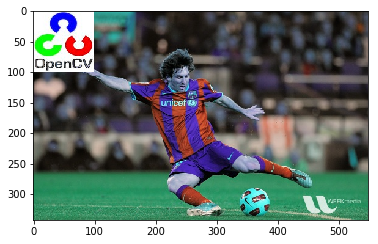

In [8]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv_logo.jpg')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

#cv2.imshow('res',img1)
plt.imshow(img1)